## Proyecto Ciencia de Datos en Python Fabián Hernández 1803299

Importo paquetes necesarios para el proyecto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cargo datos usando la funcion load de numpy 
data = np.load('proyecto_training_data.npy')
mascara = np.random.rand(len(data)) <= 0.8
data_training = data[mascara]
data_test = data[~mascara]

Obtengo datos de cada columna del dataset

In [3]:
sale_price = data_training[:,0]
OverallQual = data_training[:,1]
stFLsf = data_training[:,2]
TotalRmsAbvGrd = data_training[:,3]
YearBuilt = data_training[:,4]
LotFrontage = data_training[:,5]
newLotFrontage = LotFrontage[~np.isnan(LotFrontage)]

3. Obtengo media, maximo, minimo, rango y desviacion estandar de cada dato 

In [4]:
list_mean = [np.mean(sale_price),np.mean(OverallQual),np.mean(stFLsf),np.mean(TotalRmsAbvGrd),np.mean(YearBuilt),np.nanmean(newLotFrontage)]
list_max = [np.max(sale_price),np.max(OverallQual),np.max(stFLsf),np.max(TotalRmsAbvGrd),np.max(YearBuilt),np.nanmax(newLotFrontage)]
list_min = [np.min(sale_price),np.min(OverallQual),np.min(stFLsf),np.min(TotalRmsAbvGrd),np.min(YearBuilt),np.nanmin(newLotFrontage)]
list_range = [np.ptp(sale_price),np.ptp(OverallQual),np.ptp(stFLsf),np.ptp(TotalRmsAbvGrd),np.ptp(YearBuilt),np.ptp(newLotFrontage)]
list_std = [np.std(sale_price),np.std(OverallQual),np.std(stFLsf),np.std(TotalRmsAbvGrd),np.std(YearBuilt),np.nanstd(newLotFrontage)]
list_campos = ["Property's sale price in dollars","Overall material and finish quality","First Floor square feet","Total rooms above grade","Original construction date","Linear feet of street connected to property"]
for x in range(0,6):
    print(f"Para el campo {list_campos[x]} la media es de: {list_mean[x]}, el valor maximo es de {list_max[x]}, el valor minimo es de {list_min[x]}, el rango es de {list_range[x]}, la desviacion estandar es de: {list_std[x]}\n")


 

Para el campo Property's sale price in dollars la media es de: 180669.4362244898, el valor maximo es de 755000.0, el valor minimo es de 34900.0, el rango es de 720100.0, la desviacion estandar es de: 81573.64923732352

Para el campo Overall material and finish quality la media es de: 6.082482993197279, el valor maximo es de 10.0, el valor minimo es de 1.0, el rango es de 9.0, la desviacion estandar es de: 1.3890360130785437

Para el campo First Floor square feet la media es de: 1158.985544217687, el valor maximo es de 4692.0, el valor minimo es de 334.0, el rango es de 4358.0, la desviacion estandar es de: 392.00504208788294

Para el campo Total rooms above grade la media es de: 6.505952380952381, el valor maximo es de 12.0, el valor minimo es de 2.0, el rango es de 10.0, la desviacion estandar es de: 1.6241058066523295

Para el campo Original construction date la media es de: 1970.922619047619, el valor maximo es de 2009.0, el valor minimo es de 1872.0, el rango es de 137.0, la desvia

4. Para cada variable en el dataset usar seaborn(función distplot para graficar un histograma de la variable)

[Text(0.5, 1.0, "Property's sale price in dollars")]

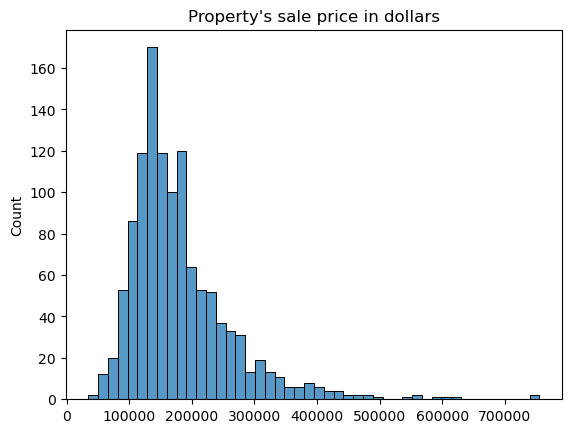

In [5]:
sns.histplot(data=sale_price).set(title="Property's sale price in dollars")


[Text(0.5, 1.0, 'Overall material and finish quality')]

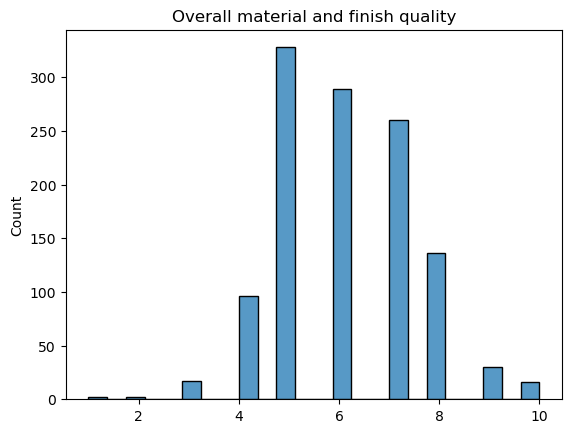

In [6]:
sns.histplot(data=OverallQual).set(title='Overall material and finish quality')

[Text(0.5, 1.0, 'First Floor square feet')]

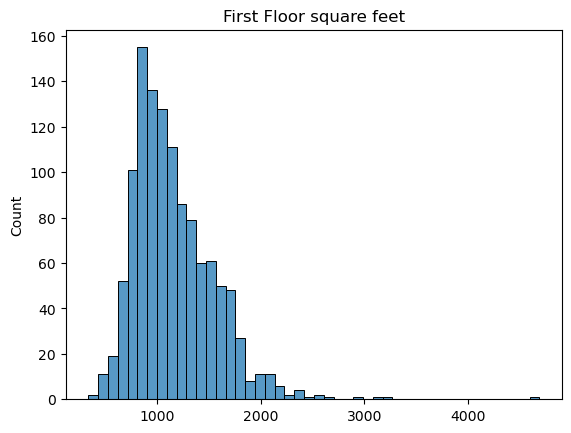

In [7]:
sns.histplot(data=stFLsf).set(title='First Floor square feet')

[Text(0.5, 1.0, 'Total rooms above grade')]

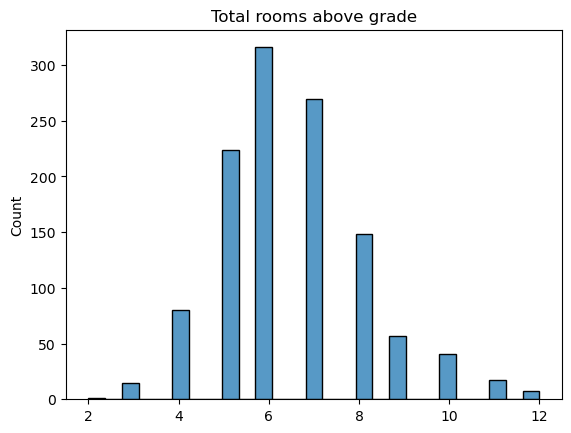

In [8]:
sns.histplot(data=TotalRmsAbvGrd).set(title='Total rooms above grade')

[Text(0.5, 1.0, 'Original construction date')]

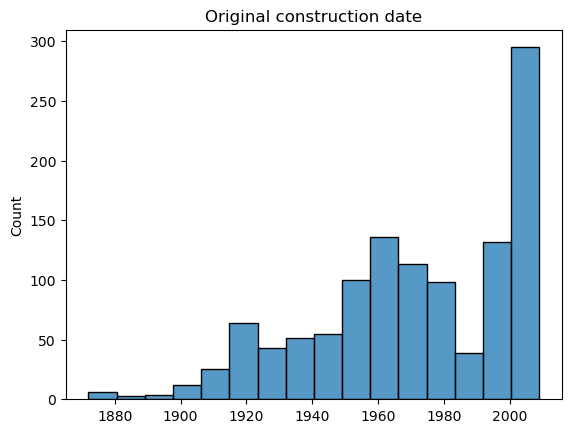

In [9]:
sns.histplot(data=YearBuilt).set(title='Original construction date')

[Text(0.5, 1.0, 'Linear feet of street connected to property')]

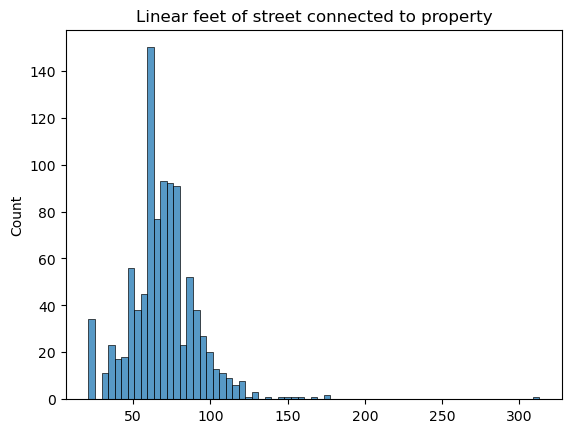

In [10]:
sns.histplot(data=newLotFrontage).set(title='Linear feet of street connected to property')

5. Para cada variable independiente x :
- Calcular el coeficiente de correlación entre x y y.
- Graficar x vs y(scatterplot) usando matplotlib.
- Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.
- Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
    con más potencial predictivo es decir las 2 variables que presentan mayor correlación
    entre dicha variable y la variable dependiente

### Calculamos coeficiente de correlacion

In [11]:
#Convierto a un dataframe de pandas dado que en numpy no da un unico coeficiente de correlacion 
df = pd.DataFrame(data_training,columns=['Sale Price','OverallQual','1stFlrSF','TotalRmsAbvGrd','YearBuilt','LotFrontage'])
print(df)

      Sale Price  OverallQual  1stFlrSF  TotalRmsAbvGrd  YearBuilt  \
0       208500.0          7.0     856.0             8.0     2003.0   
1       181500.0          6.0    1262.0             6.0     1976.0   
2       223500.0          7.0     920.0             6.0     2001.0   
3       143000.0          5.0     796.0             5.0     1993.0   
4       307000.0          8.0    1694.0             7.0     2004.0   
...          ...          ...       ...             ...        ...   
1171    185000.0          7.0    1221.0             6.0     2004.0   
1172    175000.0          6.0     953.0             7.0     1999.0   
1173    210000.0          6.0    2073.0             7.0     1978.0   
1174    266500.0          7.0    1188.0             9.0     1941.0   
1175    142125.0          5.0    1078.0             5.0     1950.0   

      LotFrontage  
0            65.0  
1            80.0  
2            68.0  
3            85.0  
4            75.0  
...           ...  
1171         62.0  

In [12]:
corr1 = df['Sale Price'].corr(df['OverallQual'])    # Coeficiente de Correlacion SalePrice vs OverallQual
corr2 = df['Sale Price'].corr(df['1stFlrSF'])       # Coeficiente de Correlacion SalePrice vs 1stFlrSF
corr3 = df['Sale Price'].corr(df['YearBuilt'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
corr4 = df['Sale Price'].corr(df['LotFrontage'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
corr5 = df['Sale Price'].corr(df['TotalRmsAbvGrd'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
print(f"El coeficiente de correlacion entre Sale Price y OverallQual es de: {corr1}")
print(f"El coeficiente de correlacion entre Sale Price y First Floor square feet es de: {corr2}")
print(f"El coeficiente de correlacion entre Sale Price y Year Built es de: {corr3}")
print(f"El coeficiente de correlacion entre Sale Price y Linear Feet of street connected to property es de: {corr4}")
print(f"El coeficiente de correlacion entre Sale Price y Total rooms above grade es de: {corr5}")


El coeficiente de correlacion entre Sale Price y OverallQual es de: 0.7874416200229585
El coeficiente de correlacion entre Sale Price y First Floor square feet es de: 0.6012875202409572
El coeficiente de correlacion entre Sale Price y Year Built es de: 0.5108938559103892
El coeficiente de correlacion entre Sale Price y Linear Feet of street connected to property es de: 0.3613669629919071
El coeficiente de correlacion entre Sale Price y Total rooms above grade es de: 0.5542006710671686


### Graficar x vs y(scatterplot) usando matplotlib.

<function matplotlib.pyplot.show(close=None, block=None)>

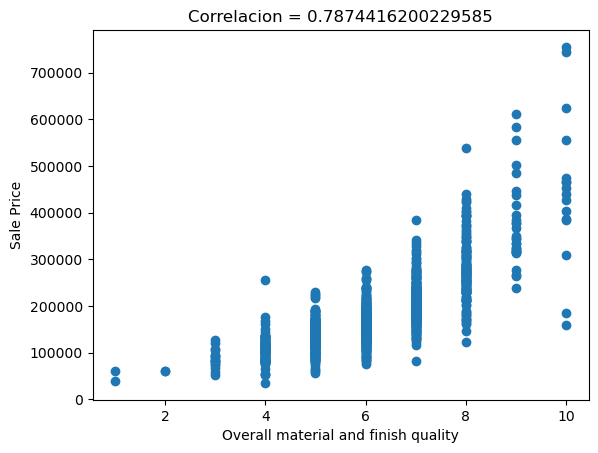

In [13]:
plt.scatter(OverallQual,sale_price)
plt.title(f"Correlacion = {corr1}")
plt.xlabel("Overall material and finish quality")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

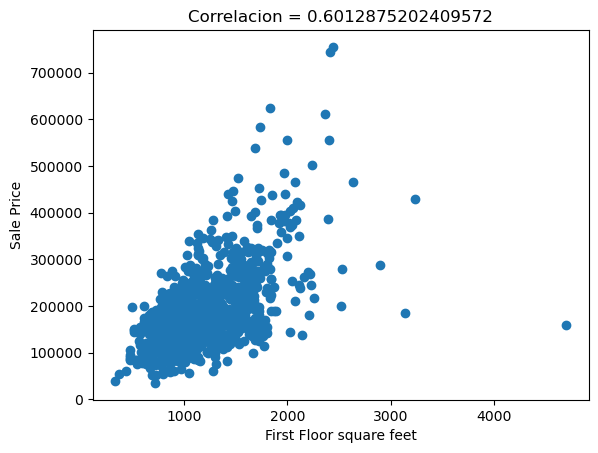

In [14]:
plt.scatter(stFLsf,sale_price)
plt.title(f"Correlacion = {corr2}")
plt.xlabel("First Floor square feet")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

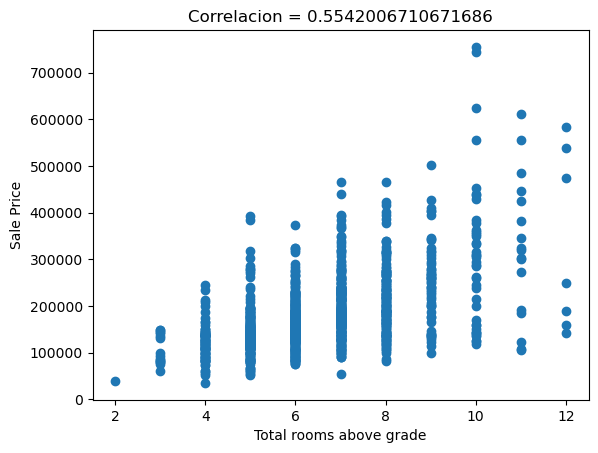

In [15]:
plt.scatter(TotalRmsAbvGrd,sale_price)
plt.title(f"Correlacion = {corr5}")
plt.xlabel("Total rooms above grade")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

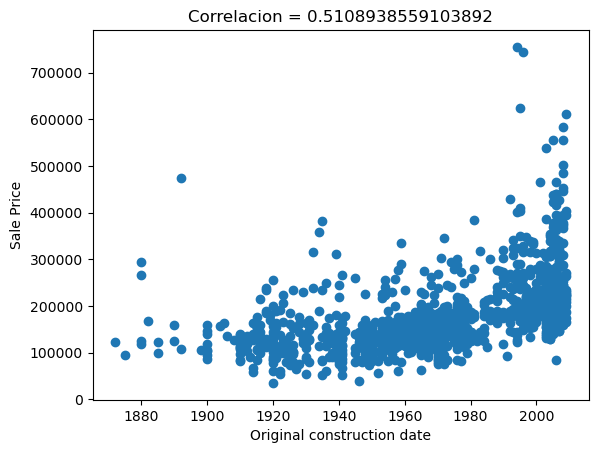

In [16]:
plt.scatter(YearBuilt,sale_price)
plt.title(f"Correlacion = {corr3}")
plt.xlabel("Original construction date")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

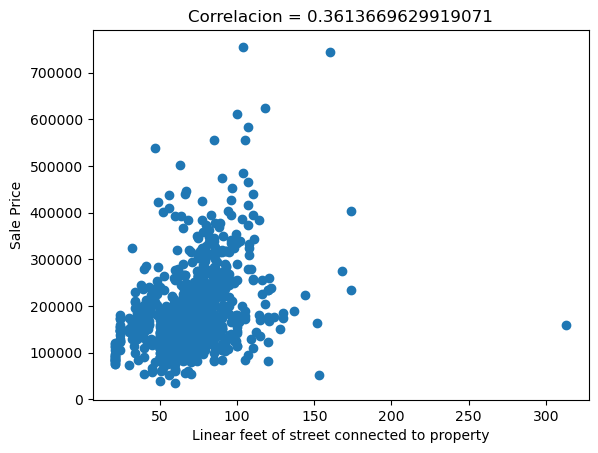

In [17]:
plt.scatter(LotFrontage,sale_price)
plt.title(f"Correlacion = {corr4}")
plt.xlabel("Linear feet of street connected to property")
plt.ylabel("Sale Price")
plt.show

#### Dado las graficas anteriores junto con el coeficiente de correlacion las dos variables con mas potencial predictivo para la variable Sale Price son OverallQual(Overall material and finish quality) y First Floor square feet por lo que los modelos se implementaran en base a estas dos variables 

## Se empieza a trabajar con programacion orientada a objetos

In [26]:
class Modelo:
    def __init__(self,varx,vary,epochs,print_error_every, learning_rate):
        self.varx = varx
        self.vary = vary
        self.epochs = epochs
        self.print_error_every = print_error_every
        self.learning_rate = learning_rate
        self.b1 = 0.1
        self.b0 = 0.2
        self.betas = np.array([self.b1,self.b0])
        vect1 = np.ones_like(self.varx).reshape(-1,1)
        self.varx = np.reshape(self.varx,(-1,1))
        self.A = np.hstack([self.varx,vect1])  
        self.dic_modelos = {}
        self.dic_errores = {}
        self.error = 0
    def __repr__(self):
        return f"{self.A}"
    def iter_for_betas(self):
        for iter in range(self.epochs):
            yEstimada = np.dot(self.A,self.betas) 
            self.error = np.mean(1/2*np.power(yEstimada-self.vary,2)) # Calculo error

            deltas = np.mean(np.multiply(self.A,(yEstimada-self.vary).reshape((-1,1))),axis=0)
            deltas = self.learning_rate*deltas
            self.betas[0] = self.betas[0] - deltas[0]
            self.betas[1] = self.betas[1] - deltas[1]
            
            #Instruccion 6.4
            if(iter%self.print_error_every == 0):
                print(f"El error es de: {self.error} para la iteracion: {iter}")
                
                
            #Almacenamos modelo resultante junto con error en cada iteracion, cada uno en su diccionario por separado 
            self.dic_modelos[iter] = self.betas
            self.dic_errores[iter] = self.error
            

    def obtain_last_error(self):
        return self.error
    
    def obtain_last_betas(self):
        return self.betas
    
    def obtain_dict_betas(self):
        return self.dic_modelos
    
    def obtain_dict_errores(self):
        return self.dic_errores
    
    def graph_error_time(self):
        lista_iteraciones1 = list(self.dic_errores.keys())
        lista_error1 = list(self.dic_errores.values())

        plt.plot(lista_iteraciones1,lista_error1)
        plt.ylabel('Error')
        plt.xlabel('Iteraciones')
        plt.title("Error en el transcurso de iteraciones")
        plt.show()




In [27]:
Modelo1 = Modelo(OverallQual,sale_price,100001,1000,0.01)
Modelo2 = Modelo(stFLsf,sale_price,261,1,0.000000001)

In [29]:
Modelo1.iter_for_betas()

El error es de: 19647697769.95465 para la iteracion: 0
El error es de: 1368422936.1104765 para la iteracion: 1000
El error es de: 1303727205.7535427 para la iteracion: 2000
El error es de: 1279150714.8271952 para la iteracion: 3000
El error es de: 1269814644.2253106 para la iteracion: 4000
El error es de: 1266268075.4924276 para la iteracion: 5000
El error es de: 1264920811.711611 para la iteracion: 6000
El error es de: 1264409015.7105153 para la iteracion: 7000
El error es de: 1264214595.6196115 para la iteracion: 8000
El error es de: 1264140739.6854777 para la iteracion: 9000
El error es de: 1264112683.433773 para la iteracion: 10000
El error es de: 1264102025.478269 para la iteracion: 11000
El error es de: 1264097976.7544155 para la iteracion: 12000
El error es de: 1264096438.732903 para la iteracion: 13000
El error es de: 1264095854.4722178 para la iteracion: 14000
El error es de: 1264095632.5243804 para la iteracion: 15000
El error es de: 1264095548.2112584 para la iteracion: 1600

In [31]:
Modelo2.iter_for_betas()

El error es de: 19624962011.139603 para la iteracion: 0
El error es de: 19572802103.367054 para la iteracion: 1
El error es de: 19520798236.753403 para la iteracion: 2
El error es de: 19468949944.487164 para la iteracion: 3
El error es de: 19417256761.153393 para la iteracion: 4
El error es de: 19365718222.729454 para la iteracion: 5
El error es de: 19314333866.58087 para la iteracion: 6
El error es de: 19263103231.45721 para la iteracion: 7
El error es de: 19212025857.487892 para la iteracion: 8
El error es de: 19161101286.17808 para la iteracion: 9
El error es de: 19110329060.40457 para la iteracion: 10
El error es de: 19059708724.411694 para la iteracion: 11
El error es de: 19009239823.807205 para la iteracion: 12
El error es de: 18958921905.558216 para la iteracion: 13
El error es de: 18908754517.987137 para la iteracion: 14
El error es de: 18858737210.7676 para la iteracion: 15
El error es de: 18808869534.92045 para la iteracion: 16
El error es de: 18759151042.80966 para la iterac

In [22]:
beta1 = Modelo1.obtain_last_betas()
beta1

array([  46243.93169206, -100608.49183106])

In [23]:
beta2 = Modelo2.obtain_last_betas()
beta2

array([49.49209721,  0.23919704])

## Comenzamos proceso de graficación

In [24]:
datos_model1 = Modelo1.obtain_dict_betas()
datos_error_model1 = Modelo1.obtain_dict_errores()

#### Grafico error Modelo 1

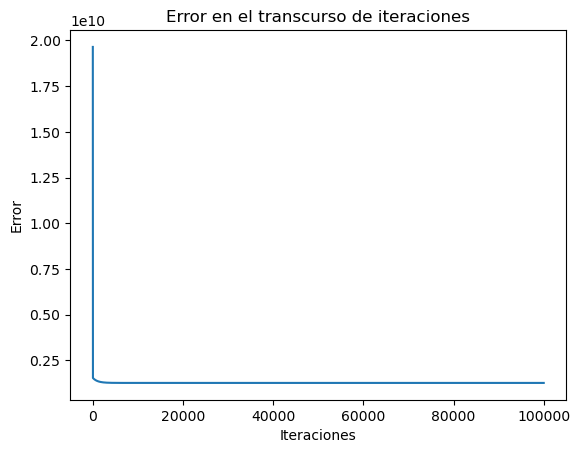

In [30]:
Modelo1.graph_error_time()

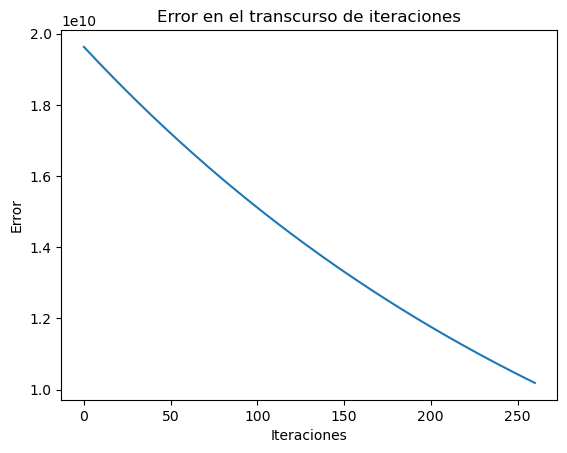

In [32]:
Modelo2.graph_error_time()